In [2]:
import investpy as ip
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import datetime
import talib
from talib import abstract
from datetime import datetime

from Python_for_finance.plot_candles import plot_candles
#
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter
import datetime as dt

C:\Users\julia\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


([<matplotlib.axis.YTick at 0x20b2988d8d0>,
 <a list of 2 Text yticklabel objects>)

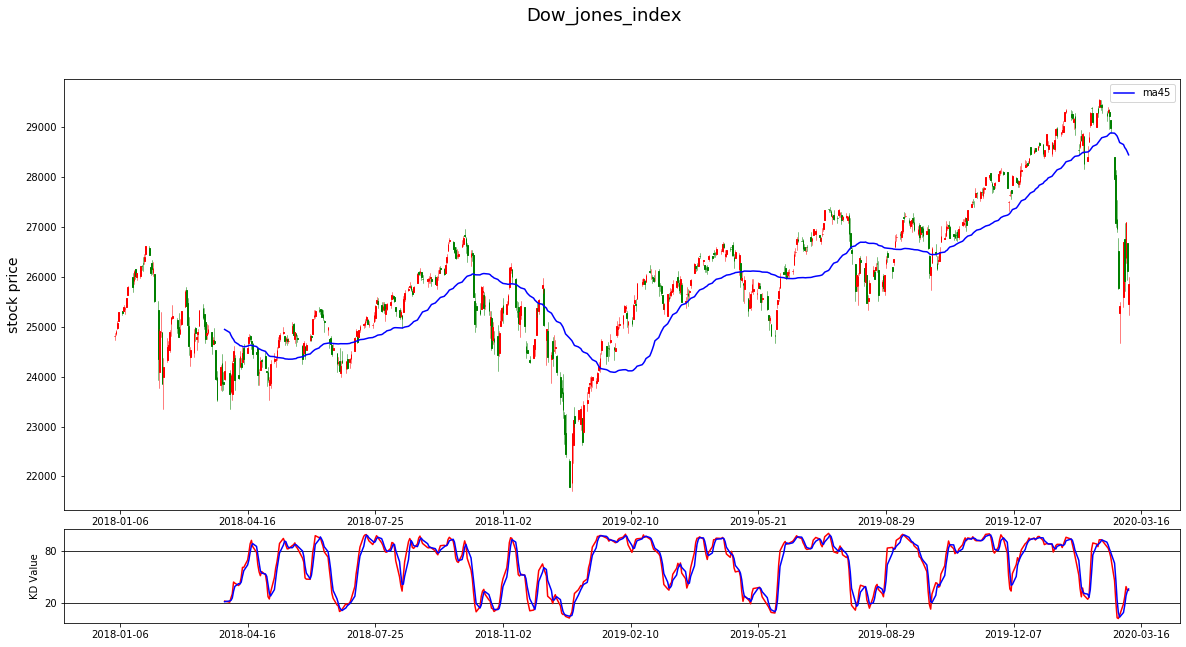

In [11]:
#fig = plt.figure()
#道瓊指數
x=datetime.now()
from_date='01/01/2018'
to_date=x.strftime('%d/%m/%y20')
#to_date='25/02/2020'
dji=ip.get_index_historical_data(index='Dow 30',country='united states',from_date=from_date, to_date=to_date)['Close']
dji=pd.DataFrame(dji)
dji.rename(columns={'Close':'close'}, inplace=True)

#道瓊指數均線
djima5=abstract.SMA(dji,10)
djima20=abstract.SMA(dji,20)
djima45=abstract.SMA(dji,45)
djima60=abstract.SMA(dji,60)
djima240=abstract.SMA(dji,240)

#道瓊KD值
djii=ip.get_index_historical_data(index='Dow 30',country='united states',from_date=from_date, to_date=to_date)              
djii.columns=['open','high','low','close','x','y']
djii=djii.drop(['x','y'],axis=1)
djiikd=abstract.STOCH(djii,fastk_period=18, slowk_period=3,slowd_period=3)

#道瓊MACD值
djiimacd=abstract.MACD(djii)



#畫k線圖資料預處理
djiii=djii.reset_index()
djiii.columns=['Datetime','Open','High','Low','Close']
djiii['Datetime']=mdates.date2num(djiii['Datetime']) #要用matplotlib 畫k線圖 必須把日期轉換成float

#畫k線圖
length=len(djiii['Datetime'].values[60:])
figure=plt.figure(facecolor='white',figsize=(20,10))
ax1=plt.subplot2grid((5,4),(0,0),rowspan=4,colspan=4,facecolor='white')
candlestick_ohlc(ax1, djiii.values,width=0.6,colorup='red',colordown='green')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.plot(djiii['Datetime'].values[-length:],djima45[-length:],'blue',label='ma45', linewidth=1.5)
ax1.legend(loc='best',ncol=0)
#ax1.grid(True,color='black',axis='x')
plt.ylabel('stock price',fontsize=14)
plt.suptitle('Dow_jones_index',color='black',fontsize=18)

#畫kd值
ax2=plt.subplot2grid((5,4),(4,0),sharex=ax1,rowspan=5,colspan=4,facecolor='white')
ax2.plot(djiii['Datetime'].values[-length:],djiikd['slowk'].values[-length:],color='red')
ax2.plot(djiii['Datetime'].values[-length:],djiikd['slowd'].values[-length:],color='blue')
ax2.grid(True,color='black',axis='y')
plt.ylabel('KD Value')
plt.yticks([20,80])
#畫macd值
#ax3=plt.subplot2grid((5,4),(6,0),sharex=ax1,rowspan=5,colspan=4,facecolor='white')
#ax3.plot(djiii['Datetime'].values[-length:],djiimacd['macd'].values[-length:],color='red')
#ax3.plot(djiii['Datetime'].values[-length:],djiimacd['macdsignal'].values[-length:],color='blue')
#ax3.grid(True,color='black')

#plt.ylabel('KD Value')


#djima5.plt()
#ax1.plot(djiii.DateTime.values[-Length:],Ma_10[-Length:],'black',label=Label1, linewidth=1.5)

In [ ]:
ax2=plt.subplot2grid((5,4),(4,0),sharex=ax1,rowspan=5,colspan=4,facecolor='white')
ax2.plot(djiii['Datetime'].values[-length:],djiikd['slowk'].values[-length:],color='red')
ax2.plot(djiii['Datetime'].values[-length:],djiikd['slowd'].values[-length:],color='blue')
#ax2.set_xticks(range(0, len(djii.index), 10))
#ax2.set_xticklabels(djii.index[::10])

In [ ]:
djiimacd

In [ ]:
ax2=plt.subplot2grid((6,4),(0,0),sharex=ax1,rowspan=1,colspan=4,facecolor='white')
ax2.plot(djiii['Datetime'].values[-length:],djiikd['slowk'].values[-length:],'red',label='ma60', linewidth=0.5)
ax2.plot(djiii['Datetime'].values[-length:],djiikd['slowd'].values[-length:],'blue',label='ma60', linewidth=0.5)


In [ ]:
djiii['Datetime'].values#[-length:]

In [ ]:
djima50[length:]

In [ ]:
djiii